In [1]:
# Import data preprocesing library
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
bank = pd.read_csv('bank_churn.csv')

In [3]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Menghapus kolom rownumber, customerId, dan Surname
bank = bank.drop(['RowNumber','CustomerId','Surname'],axis=1)
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank.shape

(10000, 11)

In [6]:
bank['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

### General information on the dataset

In [7]:
# untuk melihat 5 data teratas dari dataset bank
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# info dari data bank, dari sini terlihat tidak ada yang missing values
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
# mengecek sebuah kolom yang ada nilai nullnya
bank.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Descriptive analysis
bank.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Univariate Analysis

In [11]:
bank["Exited"].unique()

array([1, 0])

In [12]:
# Membagi data pada label
satu = bank.loc[bank['Exited'] == 1 ]
nol = bank.loc[bank['Exited'] == 0 ]

In [13]:
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# untuk melihat kolom di data bank
bank.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Bivarriate Analysis

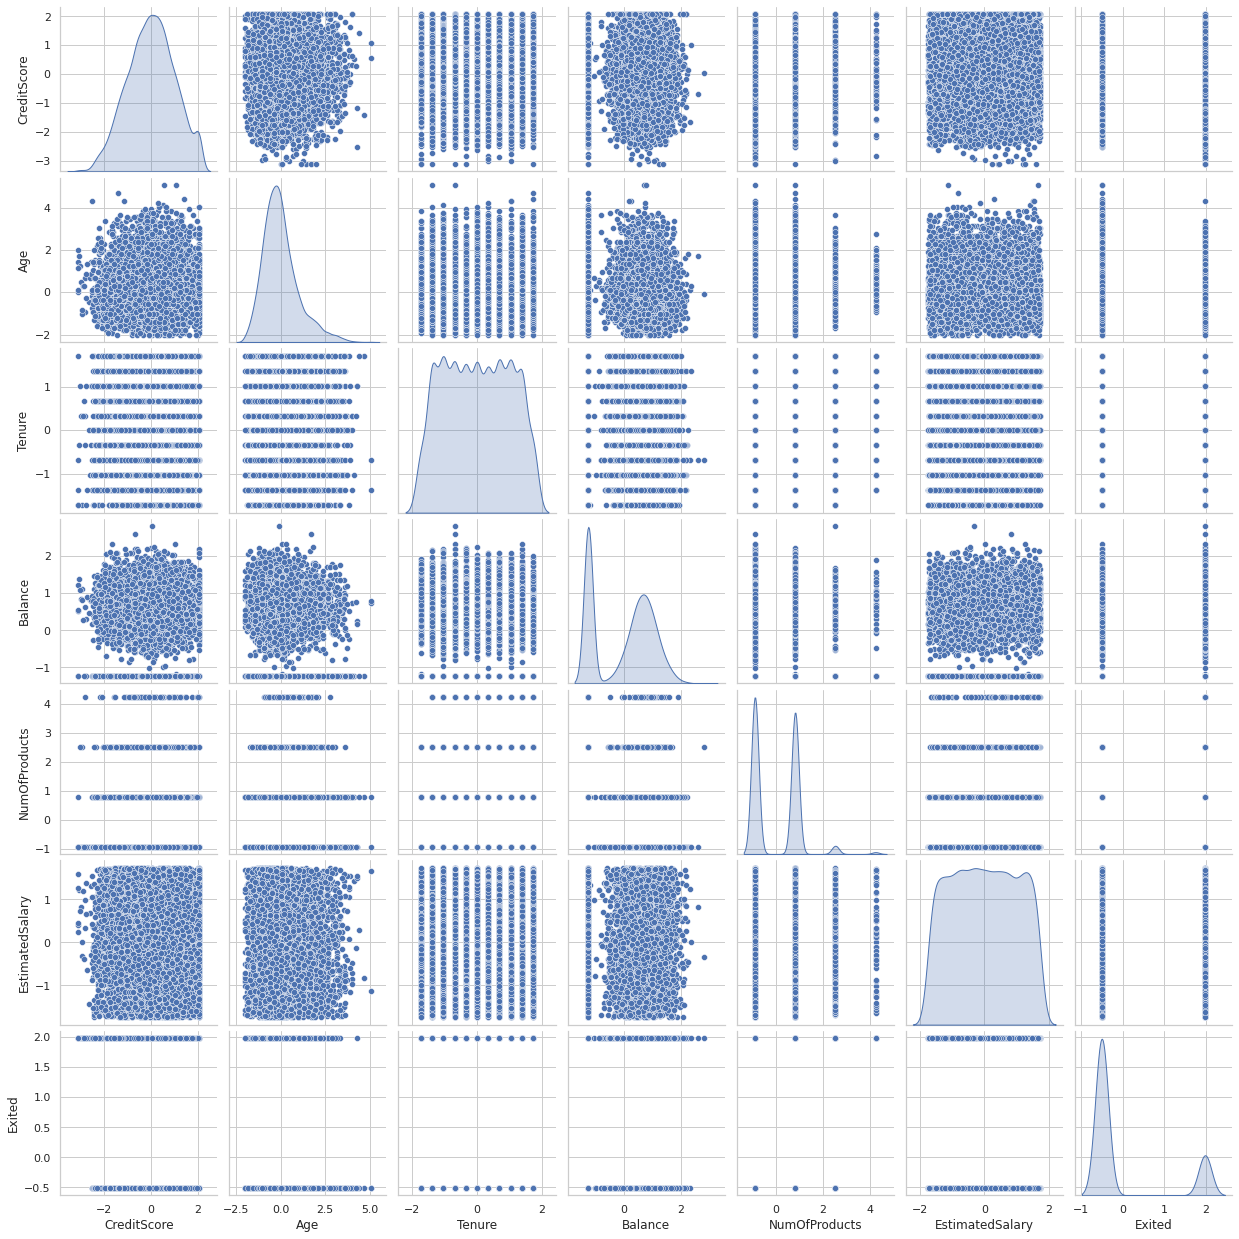

In [15]:
# Scale sebuah data
scaler = StandardScaler()
# Ekstrak hanya Kolom Numerik untuk melakukan Analisis Bivariat
subset = bank.drop(['Geography','Gender','HasCrCard','IsActiveMember'],axis=1)
scaled = scaler.fit_transform(subset)
scaled_df = pd.DataFrame(scaled,columns=subset.columns)
sns.pairplot(scaled_df,diag_kind='kde')

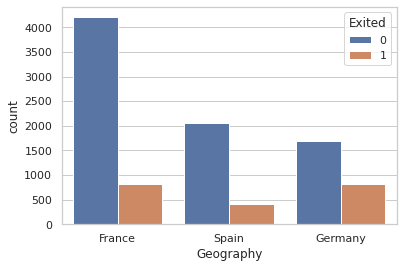

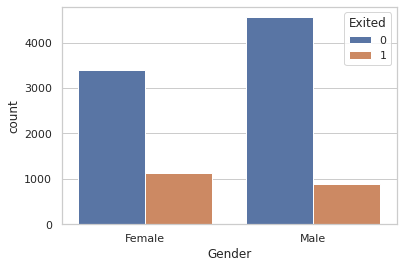

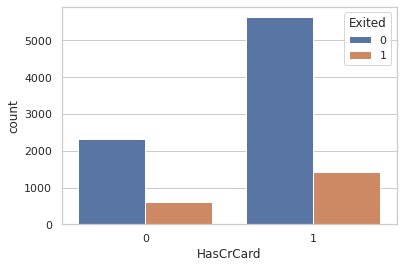

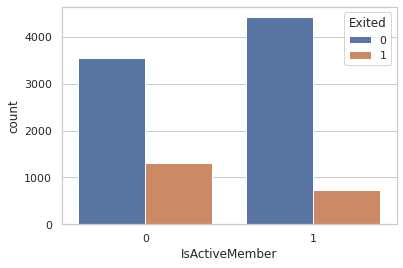

In [16]:
# Categorical Atribut vs Target Variabel
sns.countplot(x='Geography',data=bank,hue='Exited')
plt.show()
sns.countplot(x='Gender',data=bank,hue='Exited')
plt.show()
sns.countplot(x='HasCrCard',data=bank,hue='Exited')
plt.show()
sns.countplot(x='IsActiveMember',data=bank,hue='Exited')
plt.show()

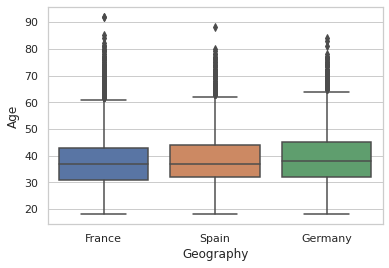

In [17]:
# plotting menggunakan boxplot
sns.boxplot(data = bank, x= 'Geography', y = 'Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


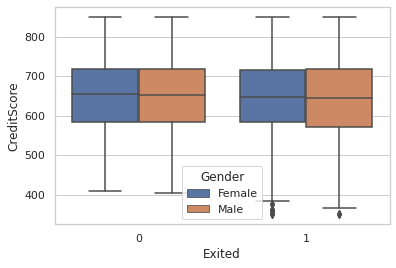

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


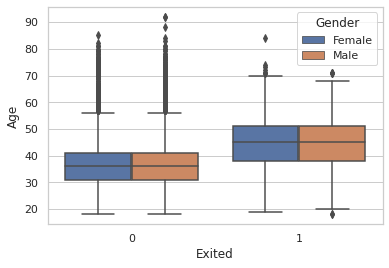

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


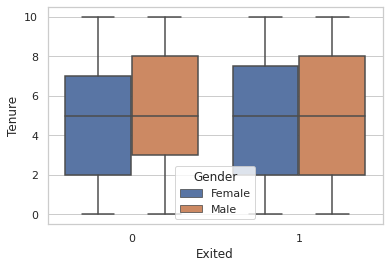

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


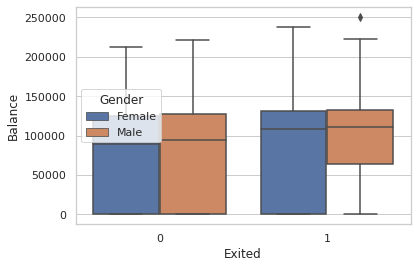

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


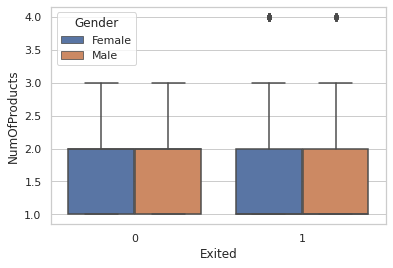

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


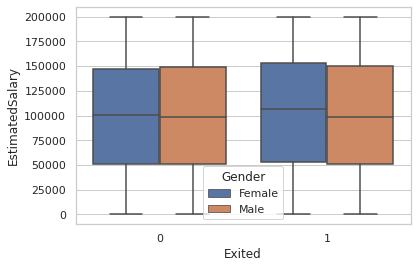

In [18]:
subset=subset.drop('Exited',axis=1)
for i in subset.columns:  
  sns.boxplot(bank['Exited'],bank[i],hue=bank['Gender'])
  plt.show()

In [19]:
bank.groupby("Gender")['Gender'].count()

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

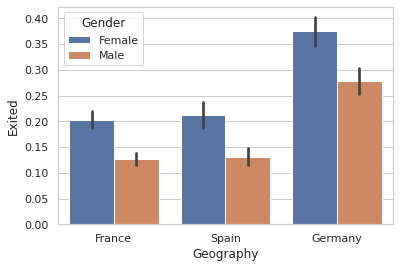

In [20]:
# plotting menggunakan barplot
sns.barplot(x="Geography", y="Exited", hue = 'Gender', data=bank)
plt.show()

In [21]:
X=bank.drop('Exited',axis=1)
y=bank.pop('Exited')

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=5)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=5)
print("X_train size adalah {}".format(X_train.shape[0]))
print("X_val size adalah {}".format(X_val.shape[0]))
print("X_test size adalah {}".format(X_test.shape[0]))

X_train size adalah 8100
X_val size adalah 900
X_test size adalah 1000


In [29]:
# Standardising data train, Val dan Test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
num_subset=scaler.fit_transform(X_train[num_cols])
X_train_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_train_num_df['Geography']=list(X_train['Geography'])
X_train_num_df['Gender']=list(X_train['Gender'])
X_train_num_df['HasCrCard']=list(X_train['HasCrCard'])
X_train_num_df['IsActiveMember']=list(X_train['IsActiveMember'])
X_train_num_df.head()
# Standarisasi data Validasi
num_subset=scaler.fit_transform(X_val[num_cols])
X_val_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_val_num_df['Geography']=list(X_val['Geography'])
X_val_num_df['Gender']=list(X_val['Gender'])
X_val_num_df['HasCrCard']=list(X_val['HasCrCard'])
X_val_num_df['IsActiveMember']=list(X_val['IsActiveMember'])
# Standarisasi Test data
num_subset=scaler.fit_transform(X_test[num_cols])
X_test_num_df=pd.DataFrame(num_subset,columns=num_cols)
X_test_num_df['Geography']=list(X_test['Geography'])
X_test_num_df['Gender']=list(X_test['Gender'])
X_test_num_df['HasCrCard']=list(X_test['HasCrCard'])
X_test_num_df['IsActiveMember']=list(X_test['IsActiveMember'])

In [30]:
# Konversi categorical atribut menjadi numerik
X_train_num_df=pd.get_dummies(X_train_num_df,columns=['Geography','Gender'])
X_test_num_df=pd.get_dummies(X_test_num_df,columns=['Geography','Gender'])
X_val_num_df=pd.get_dummies(X_val_num_df,columns=['Geography','Gender'])
X_train_num_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.178587,-1.041960,-1.732257,0.198686,0.820905,1.560315,1,1,1,0,0,0,1
1,-0.380169,-1.326982,1.730718,-0.022020,-0.907991,-0.713592,1,0,0,0,1,1,0
2,-0.349062,1.808258,-0.693364,0.681178,0.820905,-1.126515,1,0,0,1,0,1,0
3,0.625629,2.378302,-0.347067,-1.229191,0.820905,-1.682740,1,1,1,0,0,0,1
4,-0.203895,-1.136967,1.730718,0.924256,-0.907991,1.332535,1,1,0,0,1,0,1


In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
import tensorflow as tf
optimizer=tf.keras.optimizers.Adam(0.01)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [34]:
model.fit(X_train_num_df,y_train,epochs=20,batch_size=10,verbose=1)

Epoch 1/20
810/810 [==============================] - 1s 1ms/step - loss: 0.4044 - accuracy: 0.8230
Epoch 2/20
810/810 [==============================] - 1s 1ms/step - loss: 0.3597 - accuracy: 0.8537
Epoch 3/20
810/810 [==============================] - 1s 1ms/step - loss: 0.3504 - accuracy: 0.8554
Epoch 4/20
810/810 [==============================] - 1s 1ms/step - loss: 0.3464 - accuracy: 0.8599
Epoch 5/20
810/810 [==============================] - 1s 1ms/step - loss: 0.3455 - accuracy: 0.8626
Epoch 6/20
810/810 [==============================] - 1s 1ms/step - loss: 0.3420 - accuracy: 0.8623
Epoch 7/20
810/810 [==============================] - 1s 1ms/step - loss: 0.3407 - accuracy: 0.8621
Epoch 8/20
810/810 [==============================] - 1s 1ms/step - loss: 0.3403 - accuracy: 0.8625
Epoch 9/20
810/810 [==============================] - 1s 1ms/step - loss: 0.3387 - accuracy: 0.8623
Epoch 10/20
810/810 [==============================] - 1s 1ms/step - loss: 0.3375 - accuracy: 0.8616